### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Load the dataset

In [2]:
data = pd.read_csv("Medical_insurance.csv")

### Exploratory Data Analysis

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [5]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1344,56,male,40.30,0,no,southwest,10602.3850
1130,39,female,23.87,5,no,southeast,8582.3023
197,45,female,28.60,2,no,southeast,8516.8290
2718,52,female,44.70,3,no,southwest,11411.6850
664,64,female,22.99,0,yes,southeast,27037.9141


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.shape

(2772, 7)

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### Data preprocessing

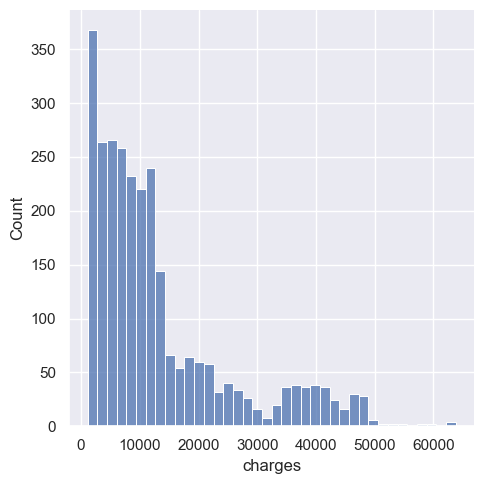

In [10]:
sns.displot(data['charges'])

#### Removing the top 1 percentile

In [11]:
q = data['charges'].quantile(0.99)
data1 = data[data['charges'] < q]

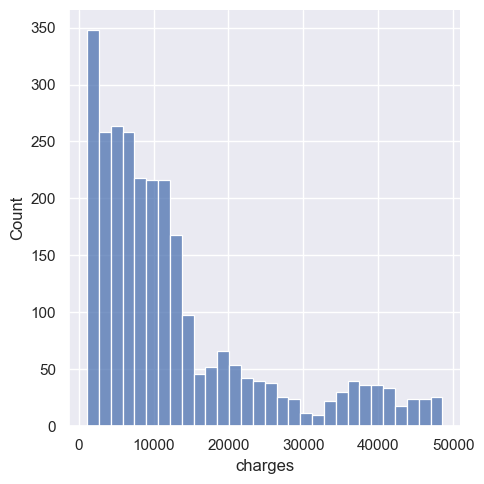

In [12]:
sns.displot(data1['charges'])

In [13]:
data1.describe()

,age,bmi,children,charges
count,2744.000000,2744.000000,2744.000000,2744.000000
mean,38.988338,30.629096,1.104956,12852.185105
std,14.047360,6.104708,1.216872,11501.955872
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.180000,0.000000,4672.704150
50%,39.000000,30.305000,1.000000,9257.146100
75%,51.000000,34.600000,2.000000,15888.887485
max,64.000000,53.130000,5.000000,48549.178350


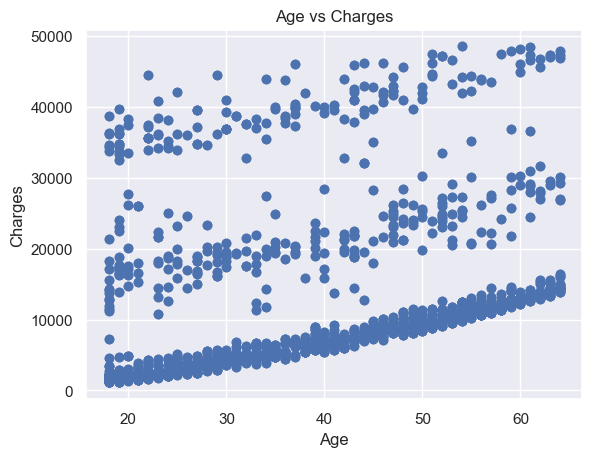

In [14]:
plt.scatter(data1['age'], data1['charges'])
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

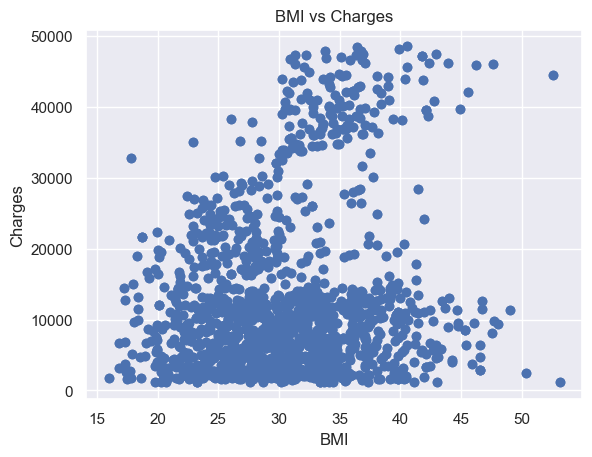

In [15]:
plt.scatter(data1['bmi'], data1['charges'])
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

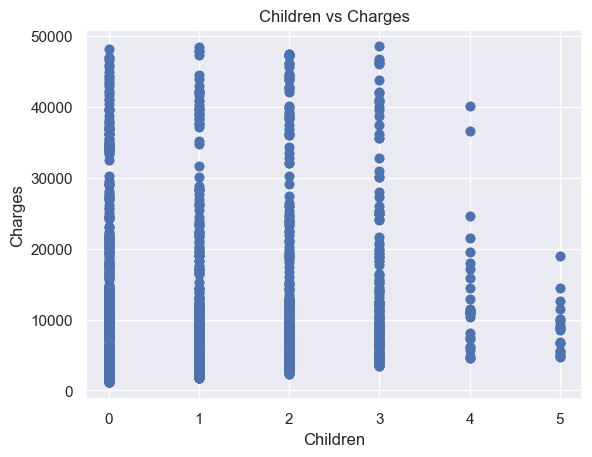

In [16]:
plt.scatter(data1['children'], data1['charges'])
plt.title("Children vs Charges")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

In [17]:
log_charges = np.log(data1['charges'])
data1['log_charges'] = log_charges

In [18]:
data1.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [19]:
data1.describe()

,age,bmi,children,charges,log_charges
count,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000
mean,38.988338,30.629096,1.104956,12852.185105,9.075854
std,14.047360,6.104708,1.216872,11501.955872,0.910940
min,18.000000,15.960000,0.000000,1121.873900,7.022756
25%,26.000000,26.180000,0.000000,4672.704150,8.449493
50%,39.000000,30.305000,1.000000,9257.146100,9.133151
75%,51.000000,34.600000,2.000000,15888.887485,9.673354
max,64.000000,53.130000,5.000000,48549.178350,10.790333


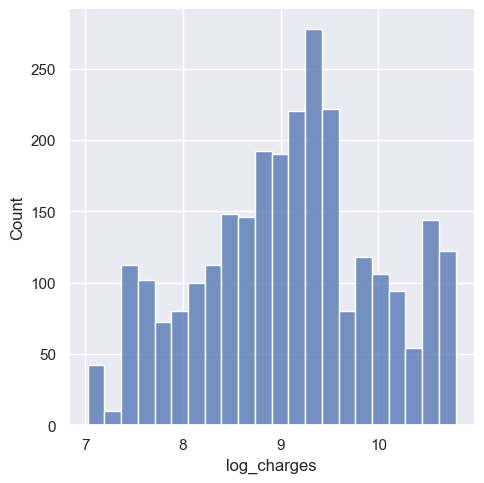

In [20]:
sns.displot(data1['log_charges'])

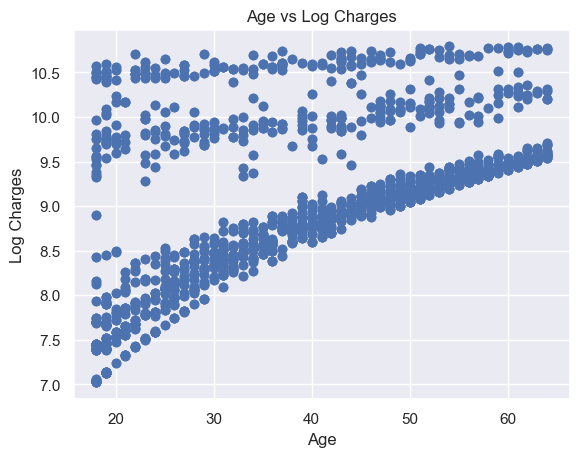

In [21]:
plt.scatter(data1['age'], data1['log_charges'])
plt.title("Age vs Log Charges")
plt.xlabel("Age")
plt.ylabel("Log Charges")
plt.show()

In [22]:
data1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Creating Dummies

In [23]:
data_cleaned = pd.get_dummies(data1)

In [24]:
data_cleaned.head()

,age,bmi,children,charges,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,7.453302,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,False,True,True,False,False,True,False,False


In [25]:
data_cleaned = data_cleaned.drop('charges', axis=1)
data_cleaned

,age,bmi,children,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,True,False,False,True,False,False,False,True
1,18,33.770,1,7.453302,False,True,True,False,False,False,True,False
2,28,33.000,3,8.400538,False,True,True,False,False,False,True,False
3,33,22.705,0,9.998092,False,True,True,False,False,True,False,False
4,32,28.880,0,8.260197,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,9.056007,True,False,True,False,False,False,True,False
2768,21,34.600,0,7.610940,True,False,True,False,False,False,False,True
2769,19,26.030,1,9.708135,False,True,False,True,False,True,False,False
2770,23,18.715,0,9.980235,False,True,True,False,False,True,False,False


In [26]:
data_cleaned.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [27]:
cols = ['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'log_charges']

In [28]:
data_final = data_cleaned[cols]
data_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,log_charges
0,19,27.900,0,True,False,False,True,False,False,False,True,9.734176
1,18,33.770,1,False,True,True,False,False,False,True,False,7.453302
2,28,33.000,3,False,True,True,False,False,False,True,False,8.400538
3,33,22.705,0,False,True,True,False,False,True,False,False,9.998092
4,32,28.880,0,False,True,True,False,False,True,False,False,8.260197


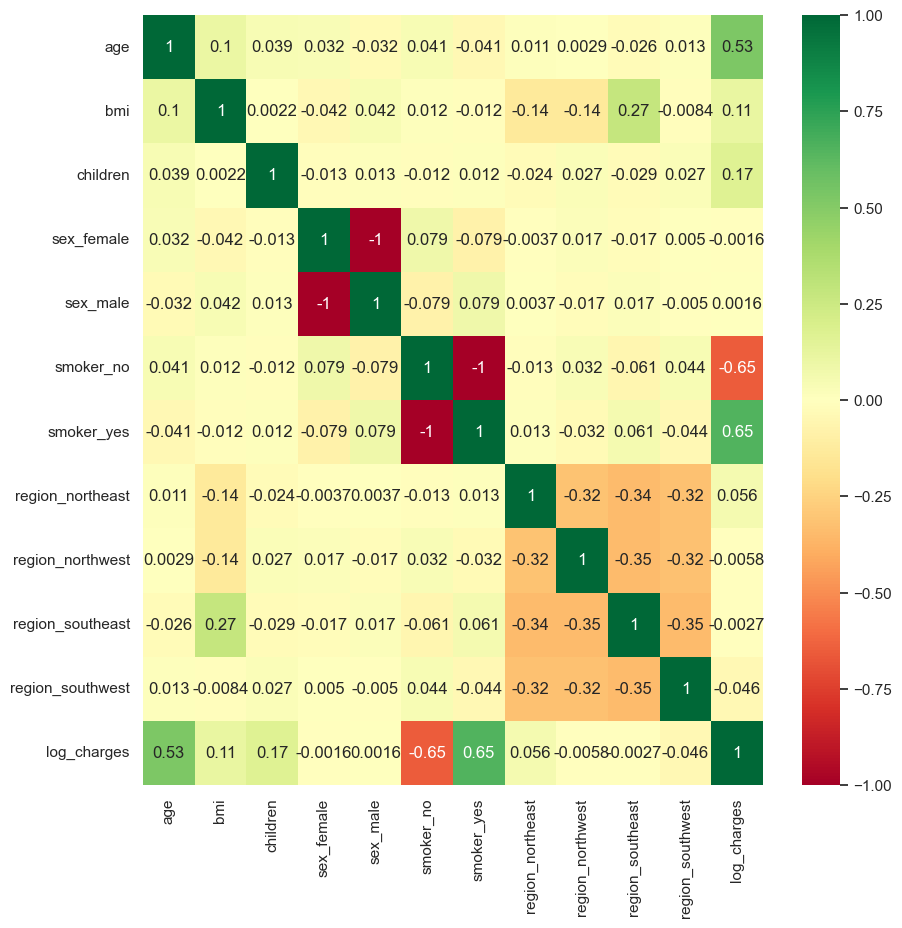

In [29]:
corrmat = data_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
g = sns.heatmap(data_final[top_corr_features].corr(),
                annot=True,  
                cmap='RdYlGn') 

#sns.heatmap(data_final.corr())

### Declaring Features and Targets

In [30]:
x = data_final.drop('log_charges', axis=1)
y = data_final['log_charges']

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

### Spliting the data as train, test

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)

In [33]:
x_train.shape

(2195, 11)

In [34]:
x_test.shape

(549, 11)

### Importing Models and metrics

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
}

In [38]:
for name, model in models.items():
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train) * 100
    test_score = model.score(x_test, y_test) * 100
    print(f"Training Score of {name} is: {train_score:.2f}%")
    print(f"Testing Score of {name} is: {test_score:.2f}%")
    print("---------------------------------------------------------")

Training Score of Linear Regression is: 77.48%
Testing Score of Linear Regression is: 69.77%
---------------------------------------------------------
Training Score of Decision Tree is: 99.83%
Testing Score of Decision Tree is: 92.72%
---------------------------------------------------------
Training Score of Random Forest is: 99.03%
Testing Score of Random Forest is: 92.60%
---------------------------------------------------------
Training Score of SVM is: 85.38%
Testing Score of SVM is: 75.51%
---------------------------------------------------------
Training Score of KNN is: 90.22%
Testing Score of KNN is: 79.16%
---------------------------------------------------------


In [39]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}

In [40]:
results

{'Linear Regression': {'MSE': 0.2440554701854654,
  'R2': 0.6976846254049406,
  'MAE': 0.2935897120990097},
 'Decision Tree': {'MSE': 0.05107801960751975,
  'R2': 0.9367288484888845,
  'MAE': 0.03991627840837273},
 'Random Forest': {'MSE': 0.06090617485393185,
  'R2': 0.9245545569942518,
  'MAE': 0.09537259939921063},
 'SVM': {'MSE': 0.19770463872446103,
  'R2': 0.75510013412219,
  'MAE': 0.18943702412598776},
 'KNN': {'MSE': 0.16822200177336102,
  'R2': 0.7916207432572716,
  'MAE': 0.22436716153310193}}

In [41]:
results_dff = pd.DataFrame(results)
results_dff

,Linear Regression,Decision Tree,Random Forest,SVM,KNN
MSE,0.244055,0.051078,0.060906,0.197705,0.168222
R2,0.697685,0.936729,0.924555,0.755100,0.791621
MAE,0.293590,0.039916,0.095373,0.189437,0.224367


In [42]:
results_df = pd.DataFrame(results).T
results_df

,MSE,R2,MAE
Linear Regression,0.244055,0.697685,0.293590
Decision Tree,0.051078,0.936729,0.039916
Random Forest,0.060906,0.924555,0.095373
SVM,0.197705,0.755100,0.189437
KNN,0.168222,0.791621,0.224367


In [43]:
mse_best_model_name = results_df['MSE'].idxmin()
r2_best_model_name = results_df['R2'].idxmax()
mae_best_model_name = results_df['MAE'].idxmin()

print(f"A model with Lowest Mean Squared Error: {mse_best_model_name}")
print(f"A model with Highest R2 score: {r2_best_model_name}")
print(f"A model with Lowest Mean Absolute Error: {mae_best_model_name}")

A model with Lowest Mean Squared Error: Decision Tree
A model with Highest R2 score: Decision Tree
A model with Lowest Mean Absolute Error: Decision Tree


In [44]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [45]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

In [46]:
df_pf = pd.DataFrame(np.exp(rf_pred), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf = df_pf.round(2)
df_sorted = df_pf.sort_values(by=['Difference%'], ascending=True)
pd.set_option('display.max_rows', None)
df_sorted

,Prediction,Target,Residual,Difference%
307,1135.95,1135.94,-0.01,0.00
78,1633.99,1633.96,-0.03,0.00
229,1704.71,1704.70,-0.01,0.00
258,11091.18,11090.72,-0.46,0.00
334,1242.74,1242.82,0.07,0.01
357,4674.00,4673.39,-0.61,0.01
547,1705.45,1705.62,0.18,0.01
514,47903.38,47896.79,-6.58,0.01
189,47274.67,47269.85,-4.82,0.01
217,7348.60,7348.14,-0.46,0.01


In [47]:
def user_data():
    age = int(input("Enter your age: "))
    sex = input("Enter your gender(male/female): ").lower()
    bmi = float(input("Enter you BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Do you Smoke(yes/no): ").lower()
    region = input("Enter your region(ne->[northeast], nw->[northwest], se->[southeast], sw->[southwest]): ").lower()

    data = {
        'age': [age], 
        'bmi': [bmi], 
        'children': [children], 
        'sex_female': [True if sex=='female' else False], 
        'sex_male': [True if sex=='male' else False], 
        'smoker_no': [True if smoker=='no' else False], 
        'smoker_yes': [True if smoker=='yes' else False], 
        'region_northeast': [True if region=='ne' else False], 
        'region_northwest': [True if region=='nw' else False], 
        'region_southeast': [True if region=='se' else False], 
        'region_southwest': [True if region=='sw' else False]
    }

    input_df = pd.DataFrame(data)
    return input_df


user_df = user_data() # object
user_array = np.array(user_df)
numerical_values = np.array(user_array[0, :3], dtype=float).reshape(1,-1) #[[1,2,3]] --> [1,2,3]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(numerical_values)
new_array = np.concatenate([scaled_values, user_array[0, 3:].reshape(1,-1)], axis=1)

log_charges = dt.predict(new_array)
original_charges = np.exp(log_charges)
print(f"Your charge for medical insurance is: ${original_charges[0]:.2f}")

Enter your age:  45
Enter your gender(male/female):  female
Enter you BMI:  23
Enter number of children:  2
Do you Smoke(yes/no):  no
Enter your region(ne->[northeast], nw->[northwest], se->[southeast], sw->[southwest]):  southeast


Your charge for medical insurance is: $6238.30
